My Model of Linear Regression

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Dataset
rng = np.random.default_rng(seed=25) # Seed 25 for reproducibility
samples = 200
x = rng.random((samples, 1)) # Random 200 Samples 2D array
y = 3 + 4 * x + 1 * rng.standard_normal((samples, 1)) # Generate the equation and add noise



Using the normal equation -> (X^T * X)^(-1) * X^T * y

In [65]:
# Closed Form Solution Normal Equation
x_b = np.c_[np.ones((samples, 1)), x] # add a dummy feature

theta_normal = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y # implement the normal equation
theta_normal  # Output the estimated coefficients


array([[2.62346623],
       [4.75588681]])

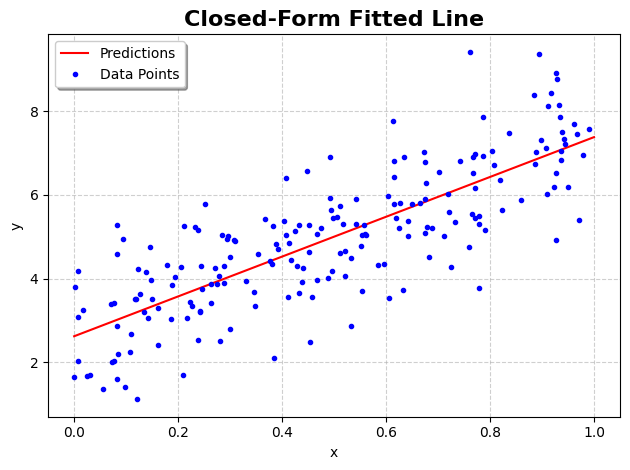

In [66]:
# create new data points for estimation
x_new_normal = np.array([[0], [1]])
x_new_b_normal = np.c_[np.ones((2, 1)), x_new]
y_new_normal = x_new_b_normal @ theta_normal

# Plot the closed_form fitted line.
plt.plot(x_new_normal, y_new_normal, "r-", label="Predictions")
plt.plot(x, y, 'b.', label='Data Points')
plt.title("Closed-Form Fitted Line", fontsize=16, fontweight='bold')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(linestyle='--', alpha=0.6)
plt.legend(fontsize=10, frameon=True, shadow=True)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.show()

Using Gradient Descent

In [71]:
# Gradient Descent
learning_rate = 0.05 # Learning rate

theta_gd = np.array([[0], [0]])  # randomly initialized model parameters

# Store our Mean Squared Error(Our Loss value)
MSE = []

for epoch in range(1000):
    predictions = x_b @ theta_gd

    # Compute loss (MSE)
    loss = np.mean((predictions - y) ** 2)
    MSE.append(loss)

    gradients = 2 / 200 * x_b.T @ (x_b @ theta_gd - y)
    theta_gd = theta_gd - learning_rate * gradients

theta_gd # Show the estimated coefficient


array([[2.62579115],
       [4.7514257 ]])

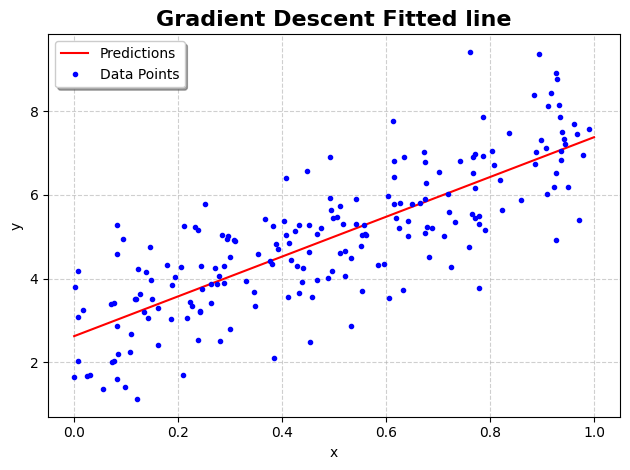

In [72]:
# create new data points
x_new_gd = np.array([[0], [1]])
x_new_b_gd = np.c_[np.ones((2, 1)), x_new]
y_new_gd = x_new_b_gd @ theta_gd
y_new_gd

plt.plot(x_new_gd, y_new_gd, "r-", label="Predictions")
plt.plot(x, y, 'b.', label='Data Points')
plt.title("Gradient Descent Fitted line", fontsize=16, fontweight='bold')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(linestyle='--', alpha=0.6)
plt.legend(fontsize=10, frameon=True, shadow=True)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.show()


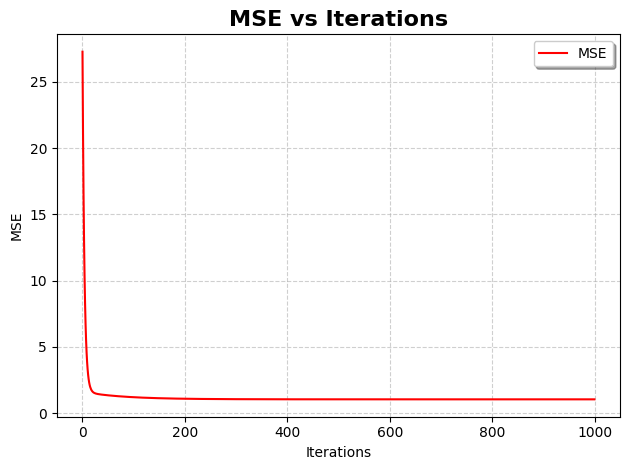

In [73]:
# Plot Loss vs Iterations
plt.plot(MSE, "r-", label="MSE")
plt.title("MSE vs Iterations", fontsize=16, fontweight='bold')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.grid(linestyle='--', alpha=0.6)
plt.legend(fontsize=10, frameon=True, shadow=True)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.show()